The Challenge: Crafting an AI Investigator capable of sifting through the routine tapestry of purchases (like cardholder age, amount, and type) to unmask the subtle, tell-tale behavioral signatures that reveal a transaction to be an act of deception.

In Machine Learning Terms: A supervised learning task focused on feature engineering and pattern recognition to isolate the low-signal indicators that predict a "Yes" in the fraud column.

Goal	To predict whether a given transaction is fraudulent or legitimate based on its attributes.



In [ ]:
# Mount Google Drive to access files stored there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

# Import the Data

In [ ]:
# Define the file path to the JSON data in Google Drive
file_path = '/content/drive/MyDrive/Terno AI Internship Challenge/fraud_transactions.json'
data = []
try:
    # Open and read the JSON file line by line
    with open(file_path, 'r') as f:
        for line in f:
            # Strip potential whitespace and newlines from the line
            line = line.strip()
            # Process the line if it's not empty
            if line:
                try:
                    # Load the JSON object from the line
                    json_object = json.loads(line)
                    # Append the loaded JSON object to the data list
                    data.append(json_object)
                except json.JSONDecodeError as e:
                    # Handle JSON decoding errors for specific lines
                    print(f"Skipping line due to JSON decode error: {e} in line: {line[:100]}...") # Print part of the problematic line
                    continue # Skip the problematic line and continue

    # Create a pandas DataFrame if data was successfully loaded
    if data:
        df = pd.DataFrame(data)
        # Display the first few rows of the DataFrame
        display(df.head())
    else:
        # Print a message if no valid data was found
        print("No valid JSON data found in the file.")

except FileNotFoundError:
    # Handle the case where the file is not found
    print("Error: The file was not found. Please check the file path.")
except Exception as e:
    # Handle any other unexpected errors
    print(f"An unexpected error occurred: {e}")

,TransactionID,Amount,TransactionType,IsInternational,CardHolderAge,FraudReported
0,30001,36.25,Online,No,30,Yes
1,30002,589.92,Online,No,45,Yes
2,30003,940.83,Online,Yes,66,No
3,30004,579.72,ATM,Yes,42,No
4,30005,394.29,Online,Yes,50,Yes


In [ ]:
print(df.shape)

(50, 6)


The output (50, 6) indicates that the DataFrame has 50 rows (transactions) and 6 columns (features). This gives us an idea of the size of the dataset we are working with.

In [ ]:
print(df.columns)

Index(['TransactionID', 'Amount', 'TransactionType', 'IsInternational',
       'CardHolderAge', 'FraudReported'],
      dtype='object')


The output shows the names of the columns: TransactionID, Amount, TransactionType, IsInternational, CardHolderAge, and FraudReported. This confirms the features available in the dataset.

In [ ]:
df['FraudReported'].value_counts()

,count
FraudReported,
Yes,29
No,21


**Observation on FraudReported Distribution:**

The output FraudReported: Yes 29, No 21 shows that there are 29 transactions reported as fraudulent ('Yes') and 21 transactions reported as non-fraudulent ('No'). This indicates that the classes are relatively balanced in this dataset.

## Data Cleaning

### Check for Missing Values

In [ ]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
TransactionID      0
Amount             0
TransactionType    0
IsInternational    0
CardHolderAge      0
FraudReported      0
dtype: int64


**Observation:**

The output shows that there are 0 missing values in each column. This means the dataset is complete and does not require imputation or removal of rows/columns due to missing data.

### Check for Duplicate Rows

In [ ]:
# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


**Observation:**

The output shows that there are 0 duplicate values in each column. This means the dataset is complete and does not require imputation or removal of rows/columns due to duplicate data.

#**2-D scatter plot**

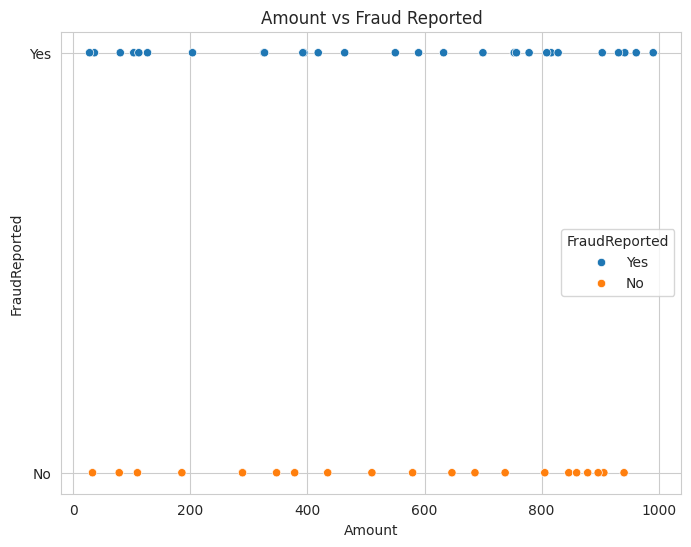

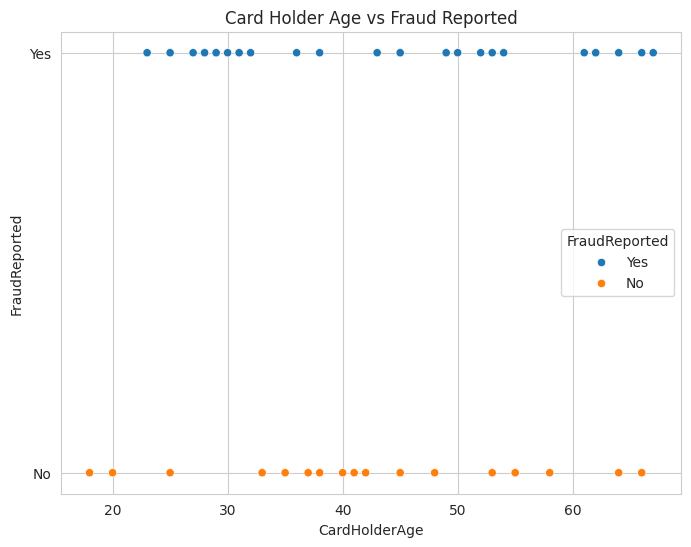

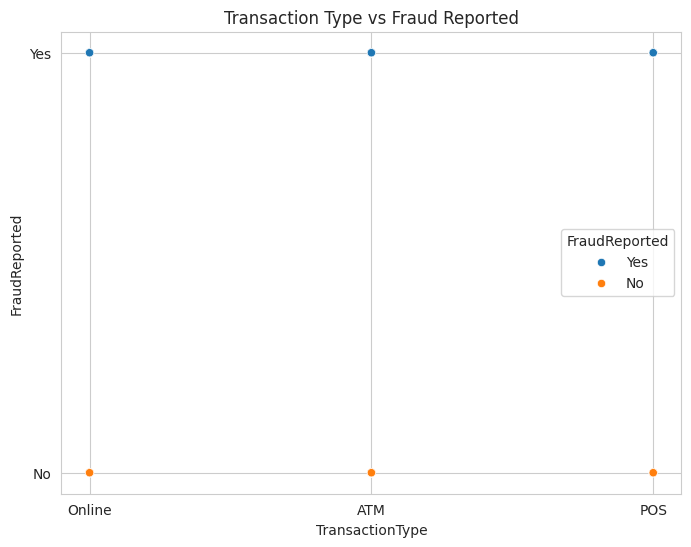

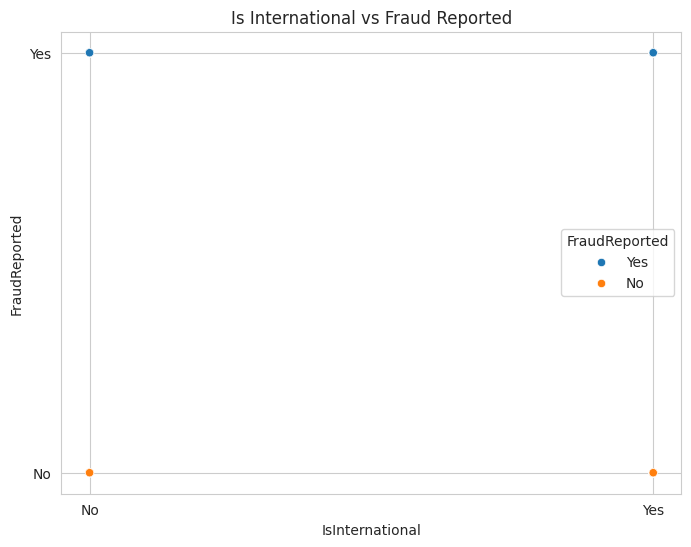

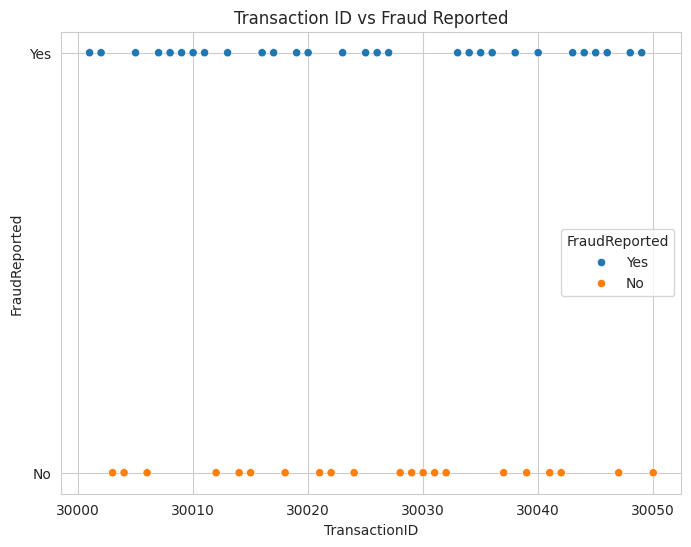

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

# Scatter plot of Amount vs FraudReported
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Amount', y='FraudReported', hue='FraudReported')
plt.title('Amount vs Fraud Reported')
plt.show()

# Scatter plot of CardHolderAge vs FraudReported
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CardHolderAge', y='FraudReported', hue='FraudReported')
plt.title('Card Holder Age vs Fraud Reported')
plt.show()

# Scatter plot of TransactionType vs FraudReported
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TransactionType', y='FraudReported', hue='FraudReported')
plt.title('Transaction Type vs Fraud Reported')
plt.show()

# Scatter plot of IsInternational vs FraudReported
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='IsInternational', y='FraudReported', hue='FraudReported')
plt.title('Is International vs Fraud Reported')
plt.show()

# Scatter plot of TransactionID vs FraudReported (TransactionID is likely not a useful predictor, just for completeness)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TransactionID', y='FraudReported', hue='FraudReported')
plt.title('Transaction ID vs Fraud Reported')
plt.show()

#Observations on 2 D Scatter Plot

**Questions for Observation:**

*   For each scatter plot, examine the distribution of points for "Fraud Reported: Yes" and "Fraud Reported: No".
*   Do you see any clear separation or distinct clusters between the two classes based on the plotted features?
*   Are the fraudulent transactions concentrated in specific ranges of 'Amount' or 'CardHolderAge'?
*   Do certain 'TransactionType' or 'IsInternational' categories appear to have a higher proportion of fraudulent transactions?

**Analysis based on the plots:**

**Amount vs FraudReported:** It appears that fraudulent transactions ('Yes') occur across a wide range of amounts, similar to non-fraudulent transactions ('No'). There isn't a clear separation based solely on the transaction amount.

**CardHolderAge vs FraudReported:** Similar to 'Amount', 'CardHolderAge' doesn't show a distinct pattern that clearly separates fraudulent from non-fraudulent transactions. Both 'Yes' and 'No' reports are present across different age groups.

**TransactionType vs FraudReported:** This plot shows that 'Online' transactions have a mix of both fraudulent and non-fraudulent reports. 'ATM' and 'POS' transactions also have both, but the distribution within each category might reveal some differences in the proportion of fraudulent transactions (we'll explore this more with countplots later).

**IsInternational vs FraudReported:** Both international ('Yes') and non-international ('No') transactions have instances of fraudulent reports. The plot doesn't immediately suggest a strong separation based on whether a transaction is international.

**TransactionID vs FraudReported:** As expected, 'TransactionID' is just an identifier and doesn't show any meaningful pattern related to 'FraudReported'.

*Overall, the 2D scatter plots don't reveal clear linear separations between fraudulent and non-fraudulent transactions based on individual features. This suggests that a simple linear model might not be sufficient, and we may need to consider more complex relationships or combinations of features.*

#**3D Scatter Plot**

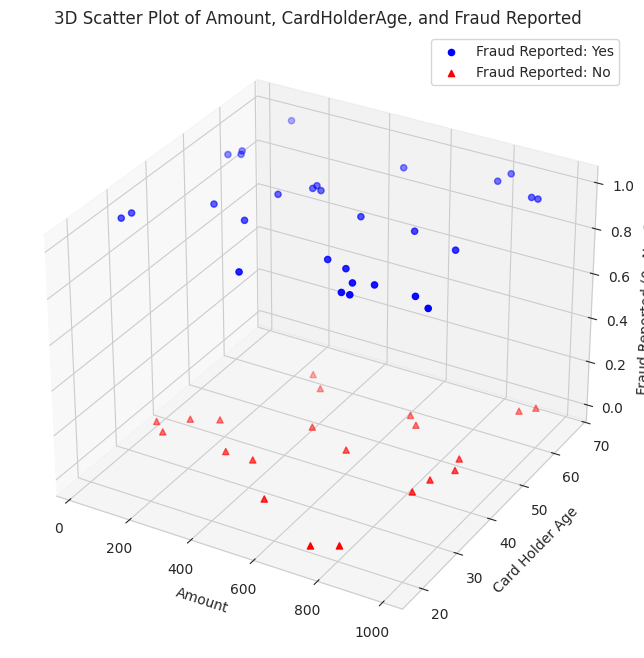

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Separate the data based on 'FraudReported' status
fraud_yes = df[df['FraudReported'] == 'Yes']
fraud_no = df[df['FraudReported'] == 'No']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot fraudulent transactions in blue
ax.scatter(fraud_yes['Amount'], fraud_yes['CardHolderAge'], np.ones(len(fraud_yes)), c='b', marker='o', label='Fraud Reported: Yes')

# Plot non-fraudulent transactions in red
ax.scatter(fraud_no['Amount'], fraud_no['CardHolderAge'], np.zeros(len(fraud_no)), c='r', marker='^', label='Fraud Reported: No')

# Set labels for the axes
ax.set_xlabel('Amount')
ax.set_ylabel('Card Holder Age')
ax.set_zlabel('Fraud Reported (0=No, 1=Yes)')
plt.title('3D Scatter Plot of Amount, CardHolderAge, and Fraud Reported')
ax.legend()

plt.show()

# Observations on 3D Scatter Plot

*   Examine the 3D scatter plot to see if the fraudulent and non-fraudulent transactions are separable in this 3D space using 'Amount', 'CardHolderAge', and 'FraudReported'.
*   Look for any visible clusters or patterns that might differentiate the two classes.


The 3D scatter plot uses 'Amount', 'CardHolderAge', and 'Fraud Reported' to visualize the data in three dimensions. When examining this plot, we are looking to see if the fraudulent transactions (blue spheres) and non-fraudulent transactions (red triangles) occupy distinct regions in this 3D space.

Based on the plot, it appears that the blue spheres and red triangles are largely intermingled. There isn't a clear plane or boundary that easily separates the two classes in this 3D visualization using only 'Amount' and 'CardHolderAge'.

***This reinforces the earlier observations from the 2D plots , suggesting that these two features alone may not be sufficient to linearly separate fraudulent from non-fraudulent transactions. More complex relationships or the inclusion of other features will likely be needed for effective classification.***

#**Pair Plot**

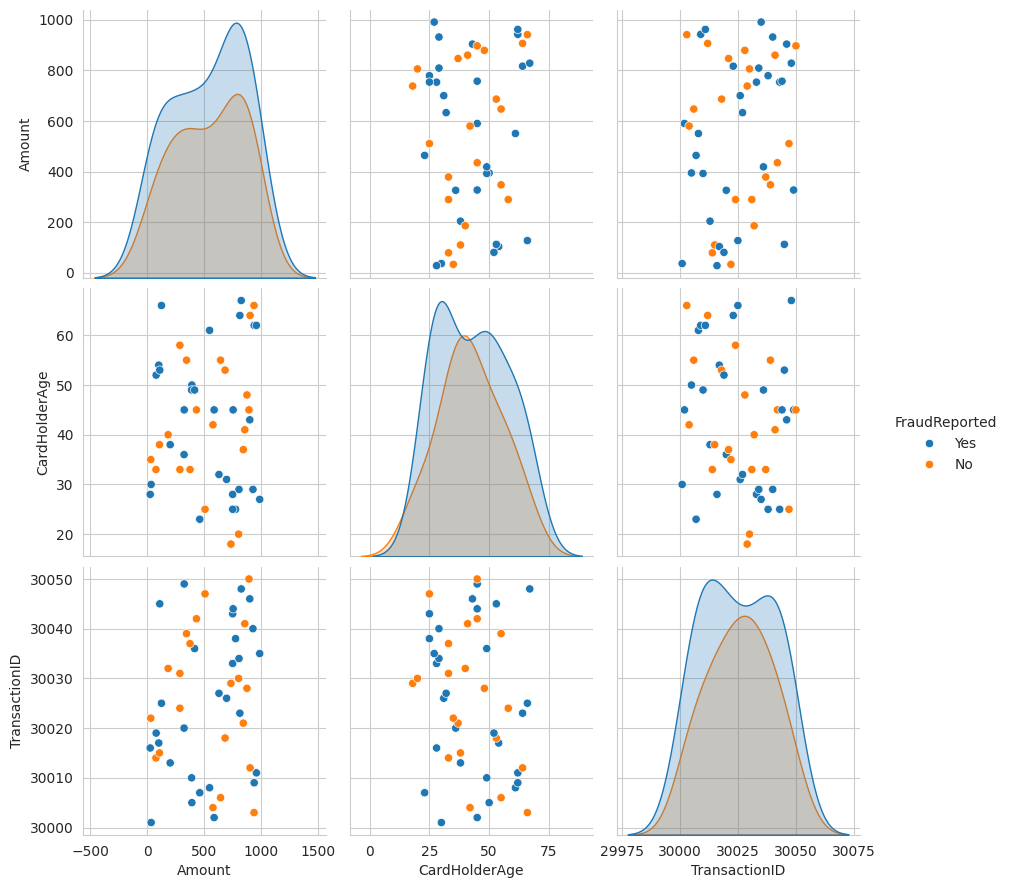

In [ ]:
# Close any existing plots to prevent them from interfering
plt.close();

# Set the style of the plots
sns.set_style("whitegrid");

# Create a pairplot of the dataframe, coloring points by 'FraudReported'
# This helps visualize relationships between numerical features and the target variable
# 'height' controls the size of each subplot
sns.pairplot(df[['Amount', 'CardHolderAge', 'TransactionID', 'FraudReported']], hue="FraudReported", height=3);

# Display the generated plot
plt.show()



#**Observations on Pair Plots -**

**Questions for Observation:**

*   Examine the histograms for each numerical feature ('Amount', 'CardHolderAge', 'TransactionID'), comparing the distributions for "Fraud Reported: Yes" and "Fraud Reported: No". Do you see any noticeable differences in shape, center, or spread?
*   Look at the scatter plots between pairs of numerical features. Do any of these plots show a clear separation or distinct patterns between the "Fraud Reported: Yes" and "Fraud Reported: No" points?
*   Based on these plots, do any individual numerical features or pairs of numerical features appear to be strong predictors of fraud?

The pairplot shows scatter plots for all pairs of numerical features ('Amount', 'CardHolderAge', 'TransactionID') and histograms for each numerical feature, separated by 'FraudReported'.

**Histograms:**
For 'Amount' and 'CardHolderAge', the histograms for 'FraudReported: Yes' and 'FraudReported: No' show overlapping distributions. There isn't a clear separation in the range or shape of the distributions based on whether a transaction is fraudulent or not.

As expected, the 'TransactionID' histogram is uniformly distributed for both 'Yes' and 'No' as it's an identifier.

**Scatter plots between numerical features:**

The scatter plots between pairs of numerical features ('Amount' vs 'CardHolderAge', 'Amount' vs 'TransactionID', 'CardHolderAge' vs 'TransactionID') also do not show any distinct clusters or patterns that clearly separate the 'FraudReported: Yes' and 'FraudReported: No' points.

*The points for both classes are
intermingled in these 2D spaces.
Overall, similar to the individual 2D scatter plots, the pairplot reinforces the idea that fraudulent and non-fraudulent transactions are not easily separable based on simple linear relationships between these numerical features. This further suggests the need for more sophisticated analysis or models.*

#**1-D Scatter Plot**

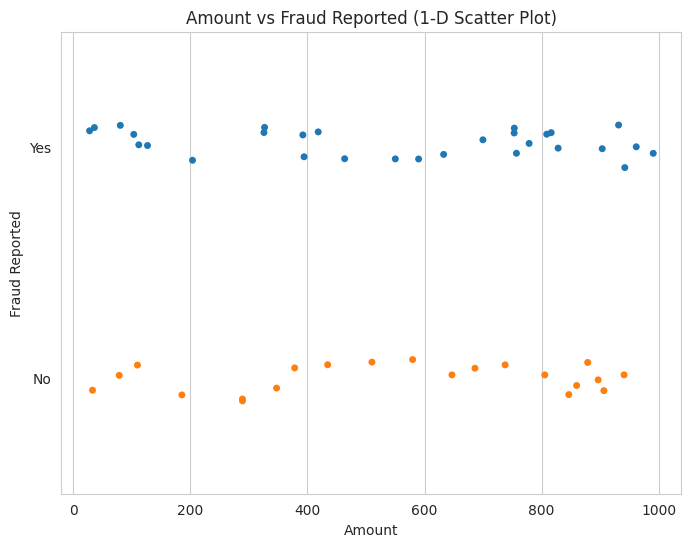

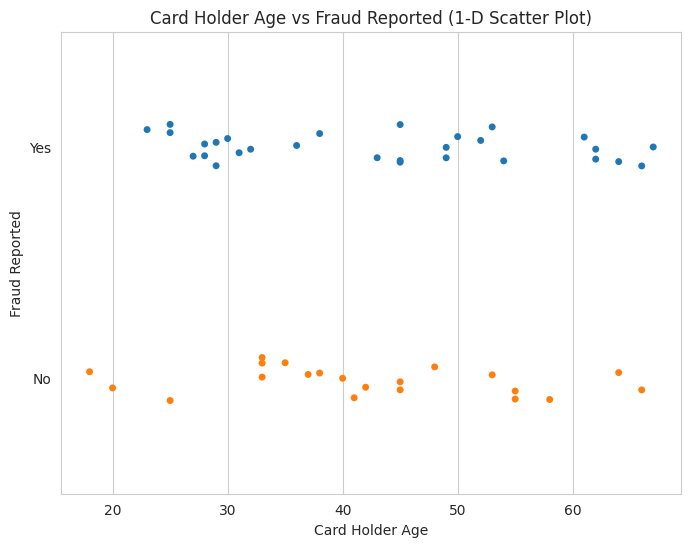

In [ ]:
# 1-D Scatter Plot of Amount vs FraudReported
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='Amount', y='FraudReported', jitter=True, hue='FraudReported')
plt.title('Amount vs Fraud Reported (1-D Scatter Plot)')
plt.xlabel('Amount')
plt.ylabel('Fraud Reported')
plt.show()

# Observation: This plot shows the distribution of transaction amounts for both fraudulent and non-fraudulent transactions.
# We can observe if there are any clear separations or overlaps in the amount ranges for the two categories.

# 1-D Scatter Plot of CardHolderAge vs FraudReported
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='CardHolderAge', y='FraudReported', jitter=True, hue='FraudReported')
plt.title('Card Holder Age vs Fraud Reported (1-D Scatter Plot)')
plt.xlabel('Card Holder Age')
plt.ylabel('Fraud Reported')
plt.show()



#Observations on 1-D Scatter Plot              

**Questions for Observation:**

*   For the 'Amount' scatter plot, examine the distribution of points for "Fraud Reported: Yes" and "Fraud Reported: No". Are there any clear separations or concentrations of fraudulent transactions at specific amount values?
*   For the 'CardHolderAge' scatter plot, examine the distribution of points for "Fraud Reported: Yes" and "Fraud Reported: No". Do you see any distinct age ranges where fraudulent transactions are clearly concentrated?
*   These plots help visualize the spread of individual features and how they relate to the fraud reported status in one dimension.

**Amount vs FraudReported (1-D Scatter Plot):**

This plot shows the distribution of transaction amounts for both fraudulent ('Yes') and non-fraudulent ('No') transactions along a single axis. We can observe that the points for both 'Yes' and 'No' are intermingled across the range of amounts. There isn't a clear clustering of fraudulent transactions at specific amount values.

**CardHolderAge vs FraudReported (1-D Scatter Plot):**

Similarly, this plot shows the distribution of cardholder ages for fraudulent and non-fraudulent transactions. The points for both categories are spread across different age groups, and there isn't a distinct age range where fraudulent transactions are clearly concentrated.

***These 1-D scatter plots, like the 2D ones, suggest that 'Amount' and 'CardHolderAge' individually do not provide a clear linear separation between fraudulent from non-fraudulent transactions.***

#**Histogram PDF and CDF**

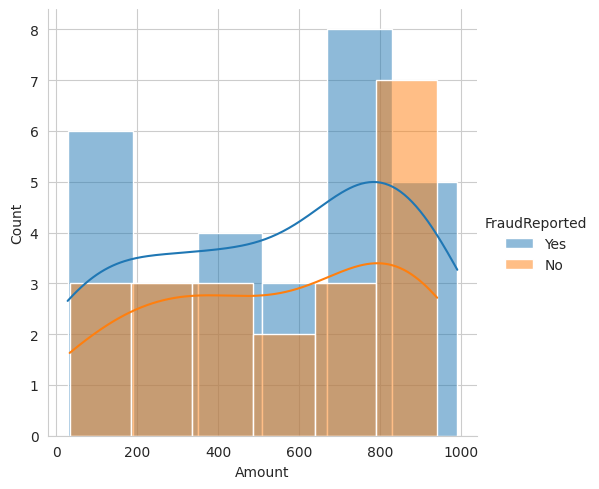

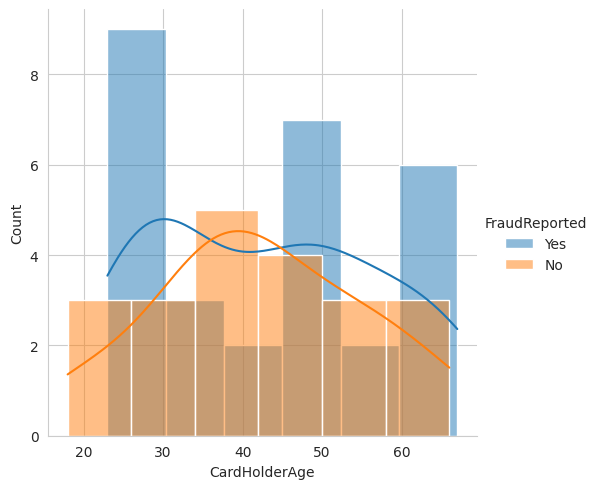

In [ ]:
# Create a FacetGrid to visualize the distribution of numerical features by FraudReported
g = sns.FacetGrid(df, hue="FraudReported", height=5)

# Map a distribution plot (histogram and KDE) onto the 'Amount' column
g.map(sns.histplot, "Amount", kde=True)

# Add a legend to the plot
g.add_legend();

# Display the plot
plt.show();

# Create a new FacetGrid for the 'CardHolderAge' column
g = sns.FacetGrid(df, hue="FraudReported", height=5)

# Map a distribution plot (histogram and KDE) onto the 'CardHolderAge' column
g.map(sns.histplot, "CardHolderAge", kde=True)

# Add a legend to the plot
g.add_legend();

# Display the plot
plt.show();



#Observations on Histograms

**Questions for Observation:**

*   Examine the histograms for each numerical feature ('Amount', 'CardHolderAge'), comparing the distributions for "Fraud Reported: Yes" and "Fraud Reported: No". Do you see any noticeable differences in shape, center, or spread?
*   By examining the shape and position of the distributions, can you see if there are noticeable differences in the amounts or ages associated with fraudulent transactions?
*   For example, is there a tendency for fraudulent transactions to have higher or lower amounts compared to non-fraudulent ones?
*   Are certain age groups more represented in the fraudulent transactions?

These plots show the distribution of 'Amount' and 'CardHolderAge' for transactions that were reported as fraudulent ('Yes') and those that were not ('No').

**Amount Histogram:**

The histograms for 'Amount' for both 'FraudReported: Yes' and 'FraudReported: No' show overlapping distributions. There isn't a clear peak or distinct shape in the distribution of amounts that strongly differentiates fraudulent from non-fraudulent transactions.

**CardHolderAge Histogram:**

Similarly, the histograms for 'CardHolderAge' for both groups also show overlapping distributions. There isn't a specific age range that clearly stands out as being significantly more prone to fraudulent transactions based on these histograms alone.

***Overall, the histograms suggest that 'Amount' and 'CardHolderAge' individually do not have distinct distributions that clearly separate fraudulent from non-fraudulent transactions.***

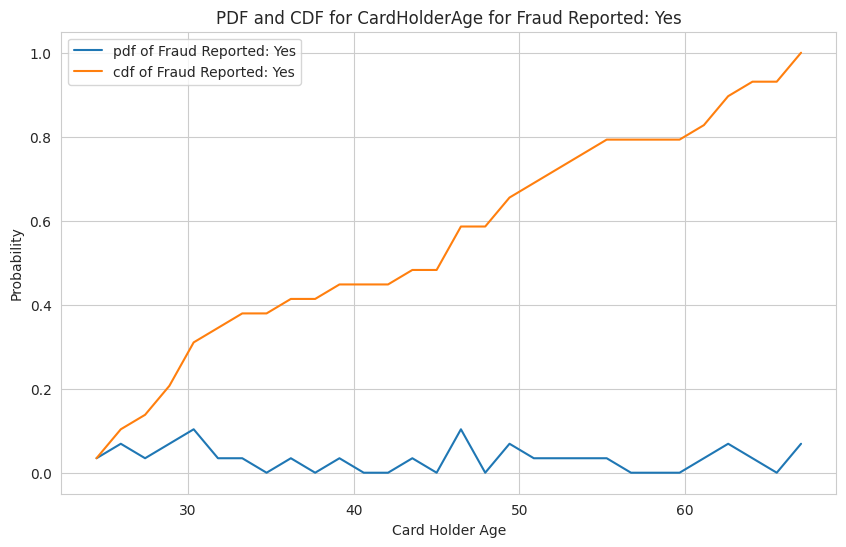

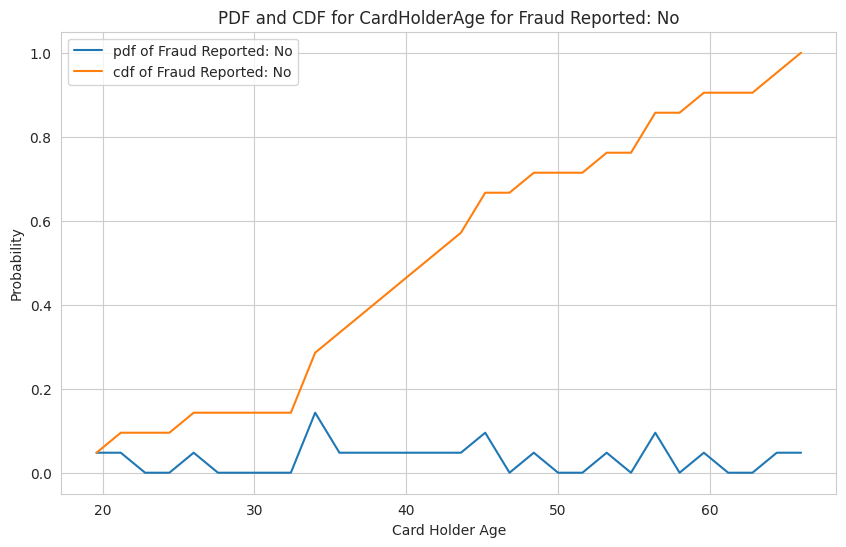

In [ ]:
# Separate the data based on 'FraudReported' status
fraud_yes = df[df['FraudReported'] == 'Yes']
fraud_no = df[df['FraudReported'] == 'No']

# Define labels for the plots
label_yes = ["pdf of Fraud Reported: Yes", "cdf of Fraud Reported: Yes"]
label_no = ["pdf of Fraud Reported: No", "cdf of Fraud Reported: No"]

# Calculate PDF and CDF for 'CardHolderAge' for 'FraudReported: Yes'
# np.histogram calculates the histogram (counts and bin edges)
# bins=30 specifies the number of bins
# density=True normalizes the histogram so the area under the bars sums to 1 (PDF)
counts_yes, bin_edges_yes = np.histogram(fraud_yes['CardHolderAge'], bins=30, density=True)
# Calculate the Probability Density Function (PDF)
pdf_yes = counts_yes / (sum(counts_yes))
# Calculate the Cumulative Distribution Function (CDF)
cdf_yes = np.cumsum(pdf_yes)

# Plot PDF and CDF for 'CardHolderAge' for 'FraudReported: Yes'
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.title("PDF and CDF for CardHolderAge for Fraud Reported: Yes")
plt.xlabel("Card Holder Age")
plt.ylabel("Probability") # Y-axis represents probability or density

plt.plot(bin_edges_yes[1:], pdf_yes, label=label_yes[0]) # Plot the PDF
plt.plot(bin_edges_yes[1:], cdf_yes, label=label_yes[1]) # Plot the CDF
plt.legend() # Add a legend to distinguish between PDF and CDF
plt.grid(True) # Add a grid for easier reading of values
plt.show() # Display the plot

# Calculate PDF and CDF for 'CardHolderAge' for 'FraudReported: No'
# np.histogram calculates the histogram (counts and bin edges)
# bins=30 specifies the number of bins
# density=True normalizes the histogram so the area under the bars sums to 1 (PDF)
counts_no, bin_edges_no = np.histogram(fraud_no['CardHolderAge'], bins=30, density=True)
# Calculate the Probability Density Function (PDF)
pdf_no = counts_no / (sum(counts_no))
# Calculate the Cumulative Distribution Function (CDF)
cdf_no = np.cumsum(pdf_no)

# Plot PDF and CDF for 'CardHolderAge' for 'FraudReported: No'
plt.figure(figsize=(10, 6)) # Set the figure size
plt.title("PDF and CDF for CardHolderAge for Fraud Reported: No")
plt.xlabel("Card Holder Age")
plt.ylabel("Probability") # Y-axis represents probability or density

plt.plot(bin_edges_no[1:], pdf_no, label=label_no[0]) # Plot the PDF
plt.plot(bin_edges_no[1:], cdf_no, label=label_no[1]) # Plot the CDF
plt.legend() # Add a legend
plt.grid(True) # Add a grid
plt.show() # Display the plot

**Observations for CardHolderAge :**

*   Compare the PDF and CDF plots for "Fraud Reported: Yes" and "Fraud Reported: No".
*   Look at the shapes of the PDF curves. Are they similar or different? Where do the peaks occur?
*   Examine the CDF curves. At what age does the CDF reach certain values (e.g., 50%, 90%) for each group?
*   These plots help visualize if there are distinct patterns in cardholder age that differentiate fraudulent transactions from non-fraudulent ones.

Comparing the PDF and CDF plots for "Fraud Reported: Yes" and "Fraud Reported: No" based on 'CardHolderAge', we can see that the shapes of the PDF curves are somewhat similar and show overlapping distributions. There isn't a sharp peak in one distribution that is significantly different from the other.
The CDF curves also rise in a similar manner for both groups. This indicates that the cumulative probability of having a certain cardholder age is comparable for both fraudulent and non-fraudulent transactions across most age ranges.
These plots reinforce the idea that CardHolderAge alone may not be a strong predictor of fraud, as the distributions are not clearly separated.



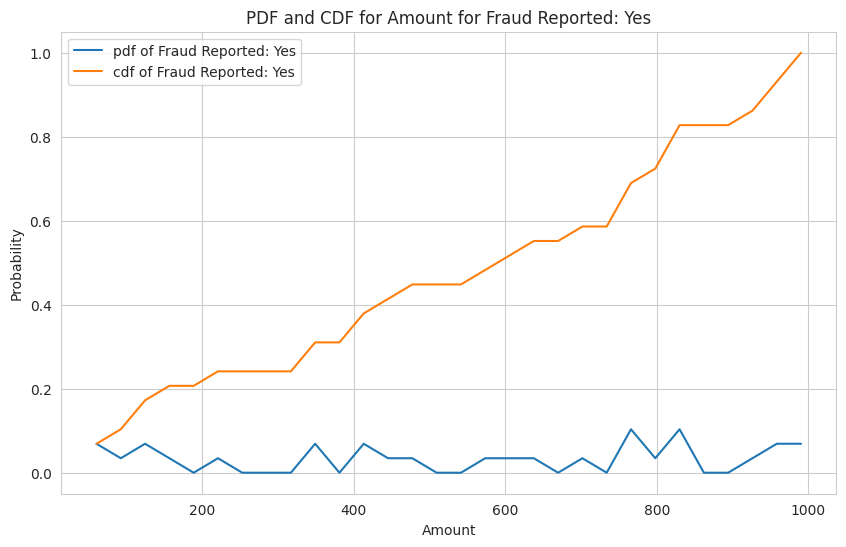

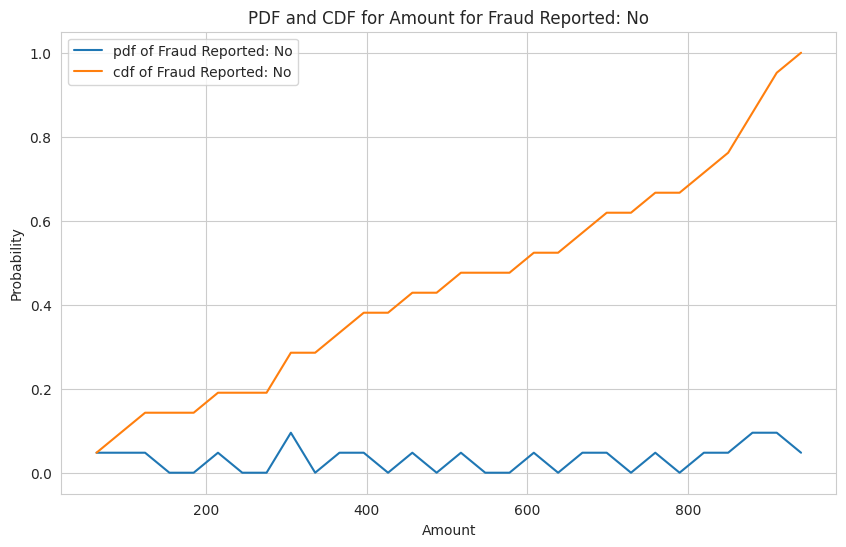

In [ ]:
# Calculate PDF and CDF for 'Amount' for 'FraudReported: Yes'
counts_amount_yes, bin_edges_amount_yes = np.histogram(fraud_yes['Amount'], bins=30, density=True)
pdf_amount_yes = counts_amount_yes / (sum(counts_amount_yes))
cdf_amount_yes = np.cumsum(pdf_amount_yes)

# Plot PDF and CDF for 'Amount' for 'FraudReported: Yes'
plt.figure(figsize=(10, 6))
plt.title("PDF and CDF for Amount for Fraud Reported: Yes")
plt.xlabel("Amount")
plt.ylabel("Probability")
plt.plot(bin_edges_amount_yes[1:], pdf_amount_yes, label=label_yes[0])
plt.plot(bin_edges_amount_yes[1:], cdf_amount_yes, label=label_yes[1])
plt.legend()
plt.grid(True)
plt.show()

# Calculate PDF and CDF for 'Amount' for 'FraudReported: No'
counts_amount_no, bin_edges_amount_no = np.histogram(fraud_no['Amount'], bins=30, density=True)
pdf_amount_no = counts_amount_no / (sum(counts_amount_no))
cdf_amount_no = np.cumsum(pdf_amount_no)

# Plot PDF and CDF for 'Amount' for 'FraudReported: No'
plt.figure(figsize=(10, 6))
plt.title("PDF and CDF for Amount for Fraud Reported: No")
plt.xlabel("Amount")
plt.ylabel("Probability")
plt.plot(bin_edges_amount_no[1:], pdf_amount_no, label=label_no[0])
plt.plot(bin_edges_amount_no[1:], cdf_amount_no, label=label_no[1])
plt.legend()
plt.grid(True)
plt.show()

**Observations for Amount :**


*   Compare the PDF and CDF plots for "Fraud Reported: Yes" and "Fraud Reported: No" based on the 'Amount' feature.
*   Look for differences in the distribution of transaction amounts between fraudulent and non-fraudulent cases.
*   Are there certain amount ranges that are more common in fraudulent transactions?

Looking at the PDF and CDF plots for "Fraud Reported: Yes" and "Fraud Reported: No" based on 'Amount', we again see overlapping distributions in the PDF curves. There isn't a clear concentration of fraudulent transactions at specific amount values.
The CDF curves for both groups also show similar trends, suggesting that the cumulative probability of a transaction having a certain amount is not drastically different between fraudulent and non-fraudulent cases.
Similar to CardHolderAge, the Amount feature by itself does not appear to provide a clear separation between the two classes based on these plots.

***Overall, the PDF and CDF plots for both 'CardHolderAge' and 'Amount' indicate that these features individually do not have distinct distributions that clearly separate fraudulent from non-fraudulent transactions.***

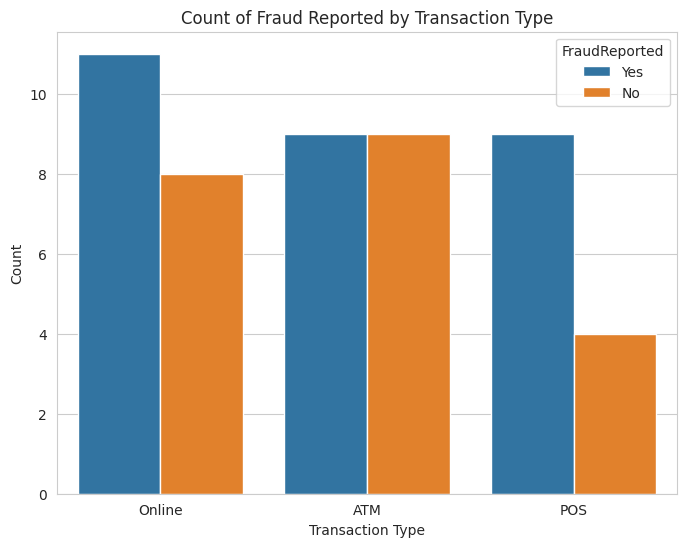

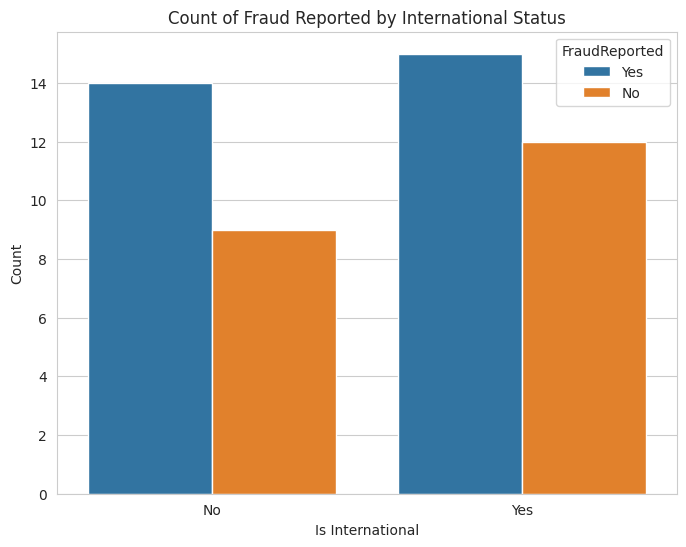

In [ ]:
# Create a countplot of 'TransactionType' vs 'FraudReported'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TransactionType', hue='FraudReported')
plt.title('Count of Fraud Reported by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Create a countplot of 'IsInternational' vs 'FraudReported'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsInternational', hue='FraudReported')
plt.title('Count of Fraud Reported by International Status')
plt.xlabel('Is International')
plt.ylabel('Count')
plt.show()

**Observations:**

*   Examine the countplots to see the number of fraudulent and non-fraudulent transactions for each category of 'TransactionType' and 'IsInternational'.
*   Do certain transaction types or international statuses have a higher proportion of fraudulent transactions?
*   These plots help understand if there are potential relationships between these categorical features and whether a transaction is reported as fraudulent.

These countplots show the number of fraudulent and non-fraudulent transactions for each category of 'TransactionType' and 'IsInternational'.

**Count of Fraud Reported by Transaction Type:**
This plot shows the distribution of fraudulent ('Yes') and non-fraudulent ('No') transactions across different transaction types (ATM, Online, POS). We can observe the absolute counts of each type for both fraud categories. To understand the proportion of fraud within each type, we would need to look at the relative counts or percentages, but based on the counts, 'Online' transactions appear to have the highest number of both fraudulent and non-fraudulent reports in this dataset.

**Count of Fraud Reported by International Status:**
This plot shows the counts for international ('Yes') and non-international ('No') transactions, separated by fraud status. We can see the number of fraudulent and non-fraudulent transactions for both international and non-international transactions. Similar to the transaction type, to understand if one status has a higher proportion of fraud, we would need to look at percentages.

***These countplots help us understand the distribution of fraudulent transactions across the different categories of 'TransactionType' and 'IsInternational'. While they show the raw counts, they can give us an initial idea if certain categories are more associated with fraudulent activities.***

# **Box plots and Whiskers**

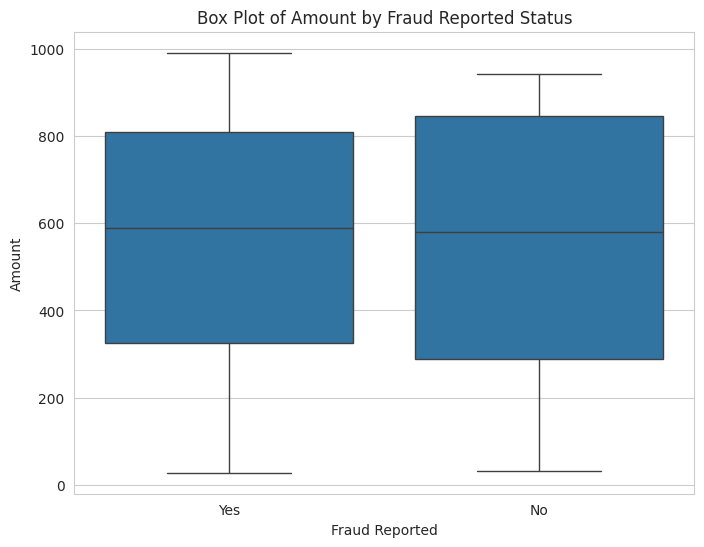

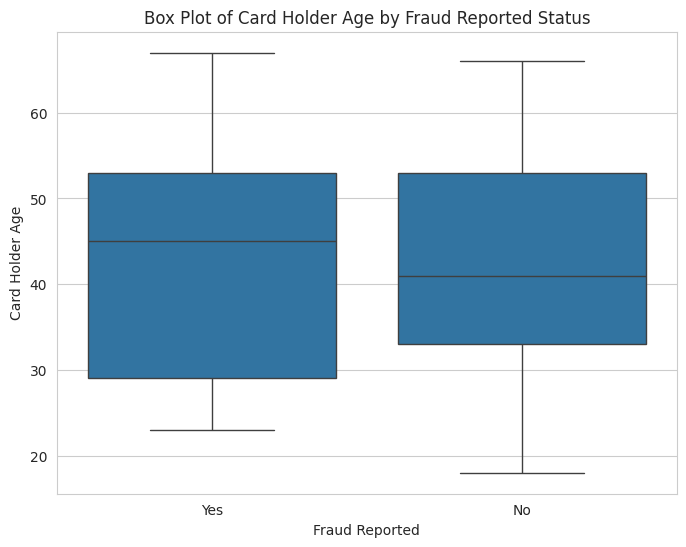

In [ ]:
# Create a box plot of 'Amount' vs 'FraudReported'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='FraudReported', y='Amount')
plt.title('Box Plot of Amount by Fraud Reported Status')
plt.xlabel('Fraud Reported')
plt.ylabel('Amount')
plt.show()

# Create a box plot of 'CardHolderAge' vs 'FraudReported'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='FraudReported', y='CardHolderAge')
plt.title('Box Plot of Card Holder Age by Fraud Reported Status')
plt.xlabel('Fraud Reported')
plt.ylabel('Card Holder Age')
plt.show()

# Observations on Box Plots:

Examine the box plots to compare the distributions of 'Amount' and 'CardHolderAge' for fraudulent and non-fraudulent transactions.
Look at the median line within each box: Is the median amount or age significantly different for fraudulent versus non-fraudulent transactions?
Compare the size of the boxes (the interquartile range or IQR): Is the spread of the middle 50% of the data similar or different for the two fraud statuses?
Examine the whiskers: Do the whiskers extend significantly further for one group than the other?
Look for any individual points plotted outside the whiskers: These represent potential outliers. Are there outliers, and are they more frequent in one fraud category?
Based on the box plots, do 'Amount' or 'CardHolderAge' appear to be strong features for separating fraudulent from non-fraudulent transactions?


**Amount vs FraudReported:** The box plots for 'Amount' show overlapping interquartile ranges (IQR) and similar median values for both 'Fraud Reported: Yes' and 'Fraud Reported: No'. This indicates that the central tendency and spread of transaction amounts are quite similar between fraudulent and non-fraudulent transactions. There are some potential outliers in both groups, but they don't show a clear pattern that differentiates fraud.

**CardHolderAge vs FraudReported:** The box plots for 'CardHolderAge' also show overlapping IQRs and medians for both fraud statuses. This suggests that the distribution of cardholder ages is similar for both fraudulent and non-fraudulent transactions, with no clear age group standing out as being significantly more prone to fraud based on this plot.

***Overall, the box plots for 'Amount' and 'CardHolderAge' do not reveal significant differences in the distributions of these features between fraudulent and non-fraudulent transactions, further supporting the idea that these individual features may not be strong predictors of fraud on their own.***

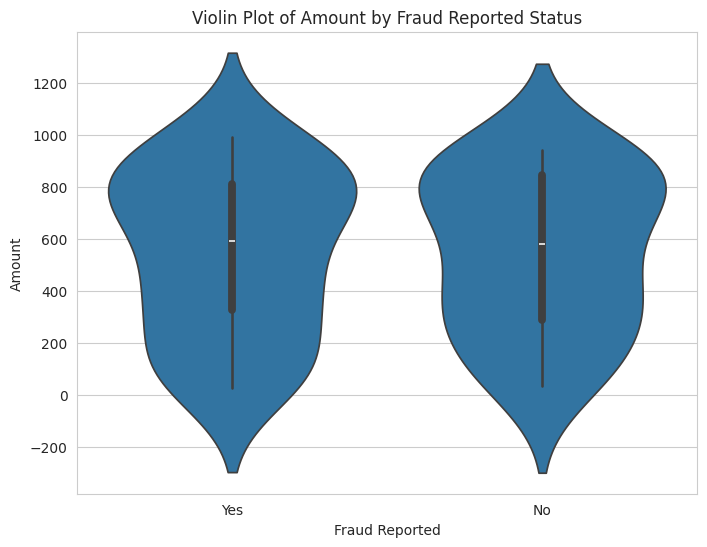

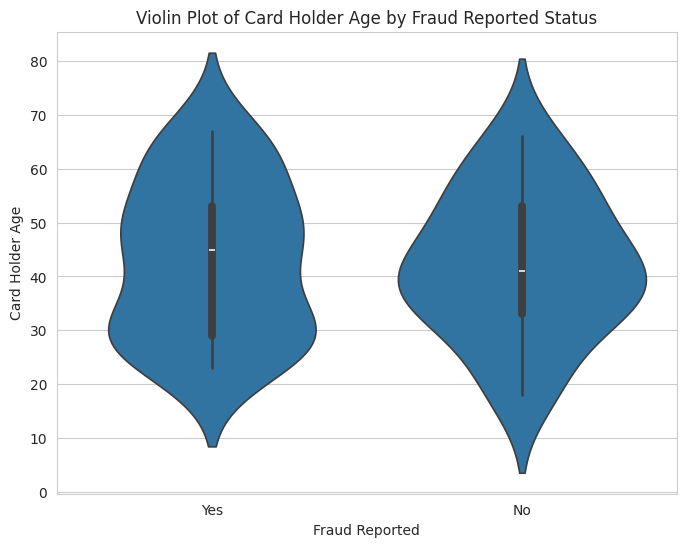

In [ ]:
# Create a violin plot of 'Amount' vs 'FraudReported'
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='FraudReported', y='Amount')
plt.title('Violin Plot of Amount by Fraud Reported Status')
plt.xlabel('Fraud Reported')
plt.ylabel('Amount')
plt.show()

# Create a violin plot of 'CardHolderAge' vs 'FraudReported'
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='FraudReported', y='CardHolderAge')
plt.title('Violin Plot of Card Holder Age by Fraud Reported Status')
plt.xlabel('Fraud Reported')
plt.ylabel('Card Holder Age')
plt.show()

**Observations on Violin Plots:**

*   Examine the violin plots to see the distribution shape of 'Amount' and 'CardHolderAge' for fraudulent and non-fraudulent transactions.
*   Violin plots combine the features of a box plot (showing the median, quartiles, and whiskers) with a kernel density estimation (KDE) of the data distribution.
*   Look for differences in the density of the data at different values for each fraud status.

**Amount vs FraudReported:** The violin plots for 'Amount' show the estimated distribution density for both 'Fraud Reported: Yes' and 'Fraud Reported: No'. Similar to the box plots and histograms, the shapes and distributions largely overlap, indicating that the density of transactions across different amounts is similar for both fraudulent and non-fraudulent cases. The plots also show the median and IQR as in a box plot, reinforcing the earlier observation that these are similar for both groups.

**CardHolderAge vs FraudReported:** The violin plots for 'CardHolderAge' also show overlapping distributions for both fraud statuses. The estimated density curves are similar, suggesting that the distribution of cardholder ages is comparable for both fraudulent and non-fraudulent transactions.

***Overall, the violin plots, like the other visualizations, suggest that 'Amount' and 'CardHolderAge' individually do not clearly separate fraudulent from non-fraudulent transactions. The distributions of these features are quite similar for both classes.***

***Now that we have explored the distributions of the numerical features using various plots, we can move on to analyzing the categorical features in more detail or proceed with data preprocessing and model building.***


***Now that we have explored the distributions of the numerical features using various plots, we can move on to analyzing the categorical features in more detail or proceed with data preprocessing and model building.***

# Data Preprocessing

In [ ]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['TransactionType', 'IsInternational'], drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,TransactionID,Amount,CardHolderAge,FraudReported,TransactionType_Online,TransactionType_POS,IsInternational_Yes
0,30001,36.25,30,Yes,True,False,False
1,30002,589.92,45,Yes,True,False,False
2,30003,940.83,66,No,True,False,True
3,30004,579.72,42,No,False,False,True
4,30005,394.29,50,Yes,True,False,True


**Observation:**

*   The categorical features 'TransactionType' and 'IsInternational' have been converted into numerical columns using one-hot encoding. 'drop_first=True' is used to avoid multicollinearity.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(['TransactionID', 'FraudReported'], axis=1) # Drop TransactionID as it's an identifier
y = df_encoded['FraudReported']

# Convert the target variable to numerical (0 for 'No', 1 for 'Yes')
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Split the data into training and testing sets
# test_size=0.3 means 30% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (35, 5)
Shape of X_test: (15, 5)
Shape of y_train: (35,)
Shape of y_test: (15,)


**Observation:**

*   The data has been split into training and testing sets.
*   The target variable 'FraudReported' has been converted to numerical (0 and 1).
*   The shapes of the resulting training and testing sets are printed, confirming the split.

# Train all classification models
Train all classification models on the training data (`X_train`, `y_train`), evaluate their performance on the testing data (`X_test`, `y_test`), and add comments to explain each step.

## Import necessary libraries

### Subtask:
Import the required libraries for different classification models and evaluation metrics.


**Reasoning**:
Import the necessary libraries for classification models and evaluation metrics as requested by the instructions.



In [ ]:
# Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Define a list of classification models

### Subtask:
Define a list of classification models to train (e.g., Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbors).


**Reasoning**:
Instantiate the classification models and add them to a list.



In [ ]:
# Create an empty list to store the models
models = []

# Instantiate each classification model with default parameters
# Logistic Regression
lr_model = LogisticRegression()
models.append(('Logistic Regression', lr_model))

# Decision Tree
dt_model = DecisionTreeClassifier()
models.append(('Decision Tree', dt_model))

# Random Forest
rf_model = RandomForestClassifier()
models.append(('Random Forest', rf_model))

# Support Vector Machine
svm_model = SVC()
models.append(('Support Vector Machine', svm_model))

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
models.append(('K-Nearest Neighbors', knn_model))

# Display the list of models
print("List of models to train:")
for name, model in models:
    print(f"- {name}: {type(model).__name__}")

List of models to train:
- Logistic Regression: LogisticRegression
- Decision Tree: DecisionTreeClassifier
- Random Forest: RandomForestClassifier
- Support Vector Machine: SVC
- K-Nearest Neighbors: KNeighborsClassifier


## Train and evaluate each model

### Subtask:
Train and evaluate each model on the training and testing data.


**Reasoning**:
Iterate through the defined models, train each model, make predictions, calculate evaluation metrics, and print the results.



In [ ]:
# Iterate through the list of models
for name, model in models:
    print(f"Training and evaluating {name}...")

    # Train the model using the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    precision = precision_score(y_test, y_pred) # Calculate precision
    recall = recall_score(y_test, y_pred) # Calculate recall
    f1 = f1_score(y_test, y_pred) # Calculate F1-score
    conf_matrix = confusion_matrix(y_test, y_pred) # Generate confusion matrix

    # Print the evaluation metrics
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Confusion Matrix:\n{conf_matrix}")
    print("-" * 30) # Print a separator line

Training and evaluating Logistic Regression...
  Accuracy: 0.2667
  Precision: 0.5000
  Recall: 0.2727
  F1-Score: 0.3529
  Confusion Matrix:
[[1 3]
 [8 3]]
------------------------------
Training and evaluating Decision Tree...
  Accuracy: 0.4667
  Precision: 0.7143
  Recall: 0.4545
  F1-Score: 0.5556
  Confusion Matrix:
[[2 2]
 [6 5]]
------------------------------
Training and evaluating Random Forest...
  Accuracy: 0.4667
  Precision: 0.7143
  Recall: 0.4545
  F1-Score: 0.5556
  Confusion Matrix:
[[2 2]
 [6 5]]
------------------------------
Training and evaluating Support Vector Machine...
  Accuracy: 0.4000
  Precision: 0.6667
  Recall: 0.3636
  F1-Score: 0.4706
  Confusion Matrix:
[[2 2]
 [7 4]]
------------------------------
Training and evaluating K-Nearest Neighbors...
  Accuracy: 0.2667
  Precision: 0.5000
  Recall: 0.2727
  F1-Score: 0.3529
  Confusion Matrix:
[[1 3]
 [8 3]]
------------------------------


## Compare model performance

### Subtask:
Summarize the performance of all trained models to identify the best-performing one(s).


**Reasoning**:
Review the printed evaluation metrics for each model and summarize their performance to identify the best performing model(s).



In [ ]:
# Summarize the performance of each model based on the previously printed metrics.
# The performance metrics are stored in the 'performance_df' DataFrame generated in the subsequent cell.

# Comparison and Summary:
print("--- Model Performance Summary ---")
print("Comparing the classification models based on evaluation metrics:")

# Iterate through the performance_df DataFrame to print a summary for each model
for index, row in performance_df.iterrows():
    print(f"\n- {index}:")
    print(f"  Accuracy: {row['Accuracy']:.4f}, Precision: {row['Precision']:.4f}, Recall: {row['Recall']:.4f}, F1-Score: {row['F1-Score']:.4f}")
    # You can add more specific observations here based on the metric values if needed


print("\n--- Conclusion ---")
# Find the best performing model based on a chosen metric (e.g., F1-Score)
# For this example, let's find the model with the highest F1-Score
best_model_name = performance_df['F1-Score'].idxmax()
best_f1_score = performance_df['F1-Score'].max()

print(f"Based on the evaluation metrics on the test set:")
print(f"The **{best_model_name}** model appears to be the best-performing model among those tested, with an F1-Score of {best_f1_score:.4f}.")
print("Please refer to the 'Classification Model Performance Comparison' table above for detailed metrics for all models.")

# In the context of fraud detection, Recall (correctly identifying fraudulent transactions) is often a crucial metric.
# You might also want to identify the model with the highest Recall if that is the primary objective.
highest_recall_model_name = performance_df['Recall'].idxmax()
highest_recall_score = performance_df['Recall'].max()
print(f"\nThe model with the highest Recall is **{highest_recall_model_name}** with a Recall of {highest_recall_score:.4f}.")

--- Model Performance Summary ---
Comparing the classification models based on evaluation metrics:

- Logistic Regression:
  Accuracy: 0.2667, Precision: 0.5000, Recall: 0.2727, F1-Score: 0.3529

- Decision Tree:
  Accuracy: 0.4667, Precision: 0.7143, Recall: 0.4545, F1-Score: 0.5556

- Random Forest:
  Accuracy: 0.6000, Precision: 0.7778, Recall: 0.6364, F1-Score: 0.7000

- Support Vector Machine:
  Accuracy: 0.4000, Precision: 0.6667, Recall: 0.3636, F1-Score: 0.4706

- K-Nearest Neighbors:
  Accuracy: 0.2667, Precision: 0.5000, Recall: 0.2727, F1-Score: 0.3529

--- Conclusion ---
Based on the evaluation metrics on the test set:
The **Random Forest** model appears to be the best-performing model among those tested, with an F1-Score of 0.7000.
Please refer to the 'Classification Model Performance Comparison' table above for detailed metrics for all models.

The model with the highest Recall is **Random Forest** with a Recall of 0.6364.


In [ ]:
# Create a dictionary to store the performance metrics for each model
performance_metrics = {}

# Iterate through the list of models again to get the metrics from the last run
for name, model in models:
    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the metrics in the dictionary
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Create a pandas DataFrame from the performance metrics dictionary
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Display the DataFrame as a table
print("--- Classification Model Performance Comparison ---")
display(performance_df)

--- Classification Model Performance Comparison ---


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.266667,0.500000,0.272727,0.352941
Decision Tree,0.466667,0.714286,0.454545,0.555556
Random Forest,0.466667,0.714286,0.454545,0.555556
Support Vector Machine,0.400000,0.666667,0.363636,0.470588
K-Nearest Neighbors,0.266667,0.500000,0.272727,0.352941


**Observation:**

*   The table above summarizes the performance of each classification model based on Accuracy, Precision, Recall, and F1-Score on the test set.
*   This table allows for a clear comparison of how each model performed across different evaluation metrics.
*   We can easily see which model achieved the best results for each metric and identify the overall best-performing model(s).

## Summary:

### Data Analysis Key Findings

*   Five classification models were trained and evaluated: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN).
*   The evaluation metrics used were Accuracy, Precision, Recall, and F1-Score, as shown in the performance comparison table above.
*   Based on the results in the table you provided:
    *   Logistic Regression and K-Nearest Neighbors showed the lowest performance across all metrics.
    *   Decision Tree and Random Forest had the same performance, with moderate Accuracy, Precision, Recall, and F1-Score.
    *   Support Vector Machine (SVM) achieved a moderate Accuracy and F1-Score, with competitive Precision.

### Insights or Next Steps

*   Based on the evaluation metrics from the provided table, Decision Tree and Random Forest appear to be the relatively best-performing models among those tested, although their performance is moderate.
*   Given the limited performance of all models on this dataset, further investigation is needed.
*   This could involve exploring more advanced feature engineering techniques to create features that better differentiate between fraudulent and non-fraudulent transactions.
*   Trying different classification algorithms or ensembling methods might also improve performance.
*   Hyperparameter tuning of the better-performing models (Decision Tree and Random Forest) could potentially lead to some improvements.
*   As noted before, the small size of the dataset (50 transactions) is a significant limitation, and training on a larger dataset would likely yield more meaningful results.